In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [2]:
df = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, delimiter=',')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
df.columns

Index(['Date', 'Temp'], dtype='object')

In [4]:
df.shape

(3650, 2)

In [5]:
X = df['Temp'].values
X

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

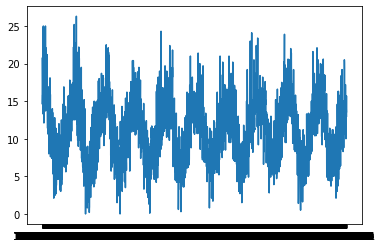

In [6]:
plt.plot(df['Date'].values, X)

### Check for Stationarity

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not.

In [7]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Temp'], autolag = 'AIC')

In [8]:
print(f'ADF Statistic: {dftest[0]}')
print(f'p-value: {dftest[1]}')
print(f'Number of Lags: {dftest[2]}')
for key, value in dftest[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.444804924611708
p-value: 0.0002470826300360912
Number of Lags: 20
Critial Values:
   1%, -3.4321532327220154
Critial Values:
   5%, -2.862336767636517
Critial Values:
   10%, -2.56719413172842


The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.

### Calculate Partial Autocorrelation and Autocorrelation

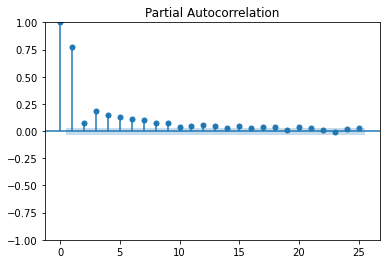

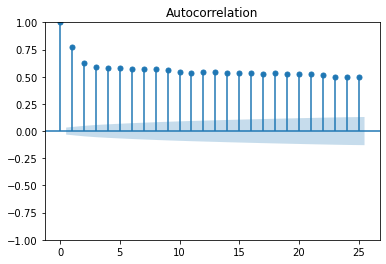

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(df['Temp'], lags=25)
acf = plot_acf(df['Temp'], lags=25)

### AR Model

In [53]:
# split dataset into training and testing
train = X[:len(X)-7] # all days before 7 days ago
test = X[len(X)-7:] # last 7 days

In [54]:
model = AutoReg(train,lags=20).fit()

In [55]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(20)   Log Likelihood               -8311.900
Method:               Conditional MLE   S.D. of innovations              2.400
Date:                Sat, 06 Jan 2024   AIC                          16667.801
Time:                        18:18:32   BIC                          16804.092
Sample:                            20   HQIC                         16716.356
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6328      0.146      4.339      0.000       0.347       0.919
y.L1           0.5913      0.017     35.609      0.000       0.559       0.624
y.L2          -0.0910      0.019     -4.715      0.0

### Prediction

In [56]:
pred = model.predict(start=len(train), end=len(X)-1, dynamic=False)

In [57]:
print(pred)

[11.90180601 13.05141921 13.47944483 13.13731965 12.93277821 12.86111125
 12.7217763 ]


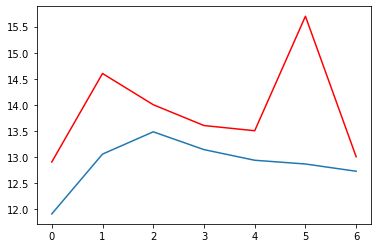

In [58]:
plt.plot(pred)
plt.plot(test, color='red')

In [59]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, pred)
mse

1.7625689727694671

In [60]:
# prediction for the next week
pred_future = model.predict(start=len(X), end=len(X)+6, dynamic=False)
pred_future

array([12.8810994 , 12.87212717, 12.89306112, 13.01405773, 13.08507688,
       12.90882915, 13.04801937])

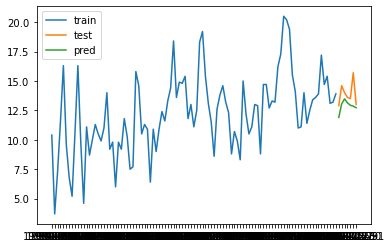

In [61]:
#plt.figure(figsize=(10,6))
plt.plot(df['Date'][:len(train)].values[-100:-1], train[-100:-1], label='train')
plt.plot(df['Date'][len(train):].values, test, label = 'test')
plt.plot(df['Date'][len(train):].values, pred, label='pred')
plt.legend()
plt.show()